In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy.interpolate import interp1d
from utils import *

In [2]:
DATA_YEAR = 2016
site = SITES['Fort Ross']

year_ghi = get_nsrdb_data(DATA_YEAR, 'ghi', site['nsrdb_site_id'], site['tz'])
hot_rocks_df = get_hot_rocks_data()

Found cached/site-131123-data-2016.pkl, loading...


In [3]:
DATA_MONTH = 7
month_filter = f'{DATA_YEAR}-{DATA_MONTH}'
month_ghi = year_ghi[month_filter]
month_temps = hot_rocks_df.loc[month_filter]

month_temps_high = month_temps[month_temps['elev'] == 'high']['temp']
month_temps_low = month_temps[month_temps['elev'] == 'low']['temp']

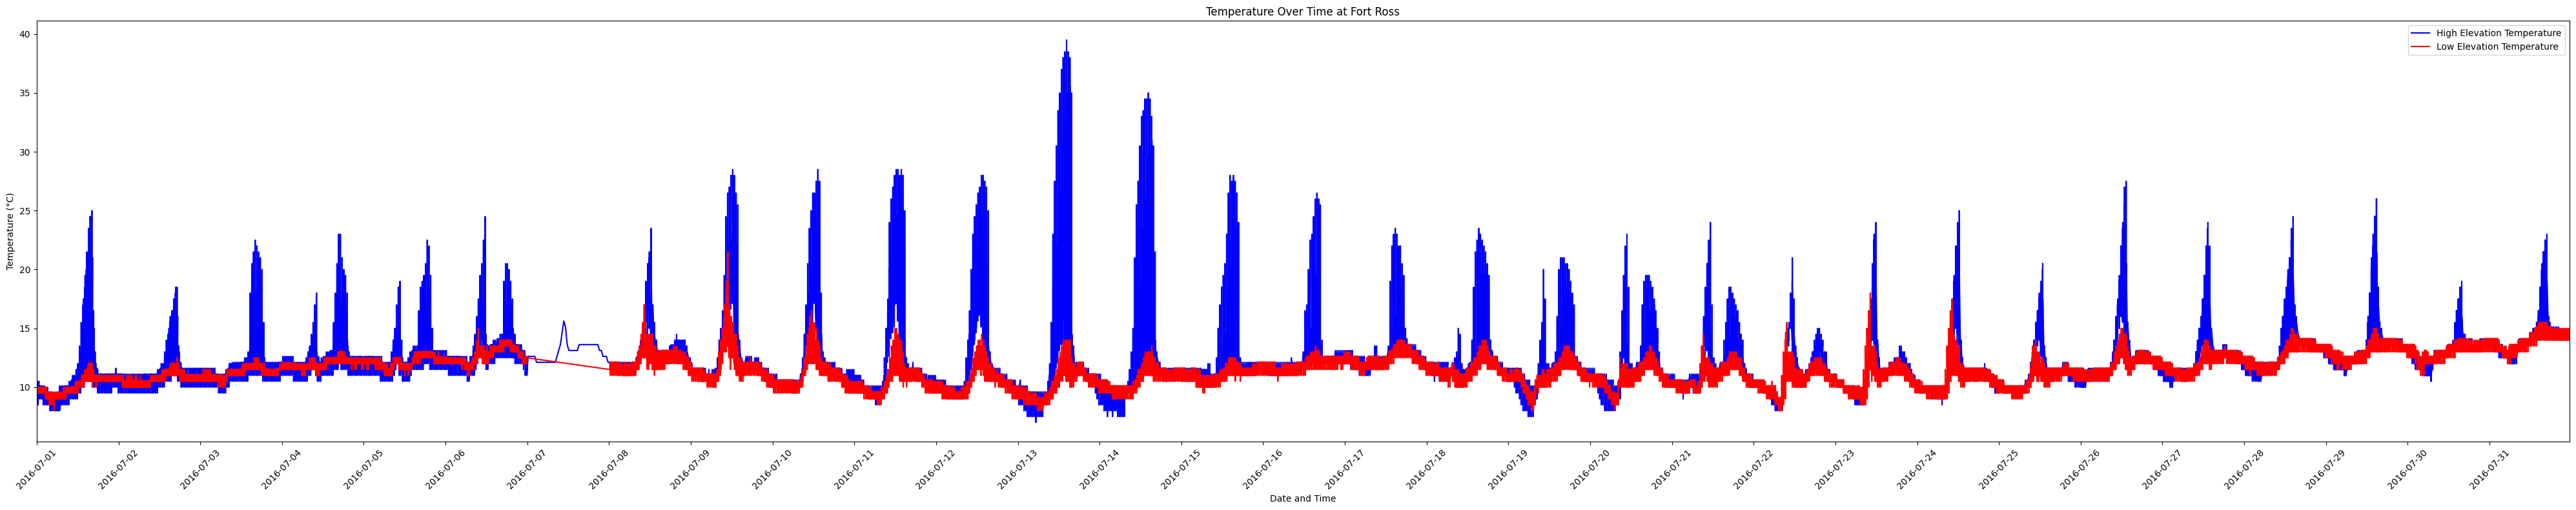

In [4]:
# Plotting the temperatures over time for both high and low elevations
plt.figure(figsize=(40, 8))
plt.plot(month_temps_high.index, month_temps_high, label='High Elevation Temperature', color='blue')
plt.plot(month_temps_low.index, month_temps_low, label='Low Elevation Temperature', color='red')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1, tz=site['tz']))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d', tz=site['tz']))
plt.xlim(month_ghi.index[0], month_ghi.index[-1])

plt.title('Temperature Over Time at Fort Ross')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
month_padded = get_month_padded(DATA_YEAR, DATA_MONTH)
tide_series = get_noaa_tide_preds(site, month_padded)
tide_high_res = interpolate_tide_preds(tide_series, month_ghi.index)

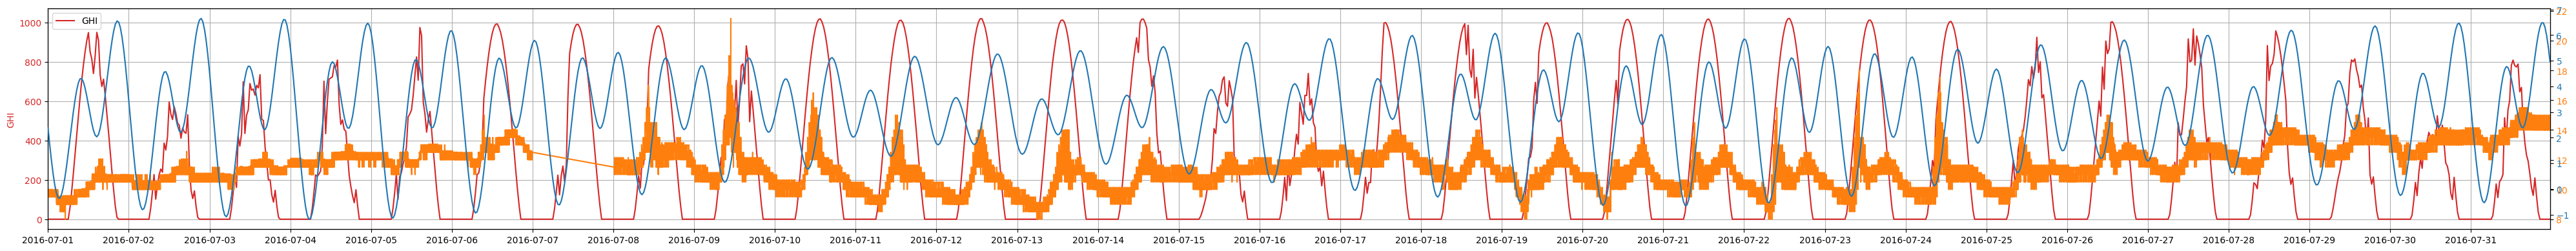

In [7]:
fig, ax1 = plt.subplots(figsize=(40, 4))

# Plot GHI data
ax1.plot(month_ghi.index, month_ghi, label='GHI', color='tab:red', zorder=3)
ax1.xaxis.set_major_locator(mdates.DayLocator(tz=site['tz']))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d', tz=site['tz']))
plt.xlim(month_ghi.index[0], month_ghi.index[-1])
ax1.set_ylabel('GHI', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(month_temps_low.index, month_temps_low, label='Low Tide Water Temp', color='tab:orange', linestyle='-', zorder=4)
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax3 = ax1.twinx()
ax3.plot(tide_high_res.index, tide_high_res, label='Tide', color='tab:blue', linestyle='-', zorder=4)
ax3.tick_params(axis='y', labelcolor='tab:blue')

ax1.grid(True)
ax1.legend(loc='upper left')

fig.tight_layout()
plt.show()


In [8]:
min_val, max_val = tide_high_res.min(), tide_high_res.max()
tide_values_normalized = (tide_high_res - min_val) / (max_val - min_val)

tide_values_inverted = 1 - tide_values_normalized

assert tide_values_inverted.shape == month_ghi.shape
tide_scaled_ghi = tide_values_inverted * month_ghi

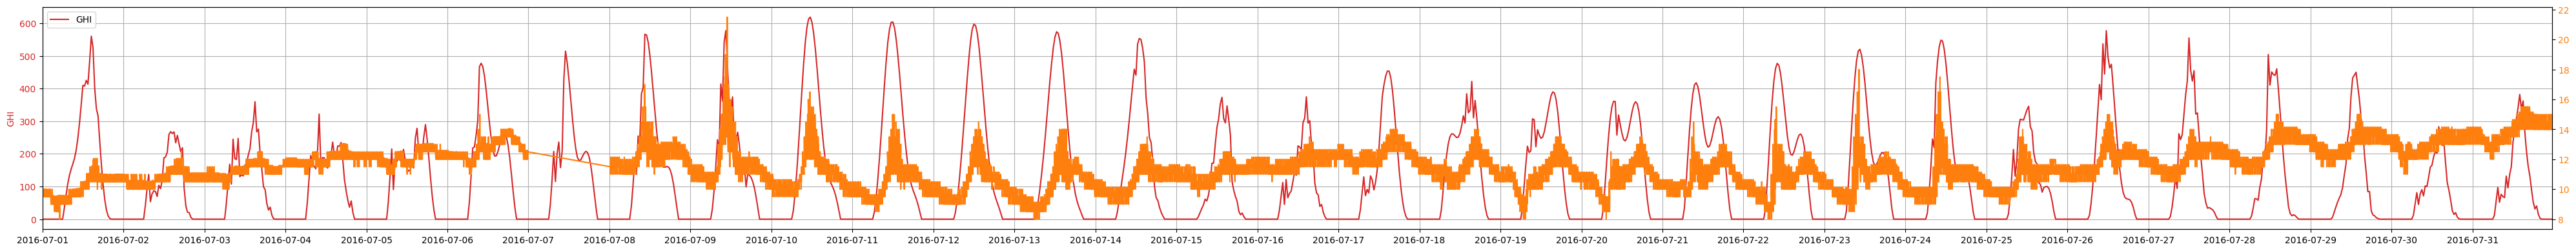

In [9]:
fig, ax1 = plt.subplots(figsize=(40, 4))

# Plot tide-scaled GHI data
ax1.plot(month_ghi.index, tide_scaled_ghi, label='GHI', color='tab:red', zorder=2)
ax1.xaxis.set_major_locator(mdates.DayLocator(tz=site['tz']))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d', tz=site['tz']))
plt.xlim(month_ghi.index[0], month_ghi.index[-1])
ax1.set_ylabel('GHI', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(month_temps_low.index, month_temps_low, label='Low Tide Water Temp', color='tab:orange', linestyle='-', zorder=1)
ax2.tick_params(axis='y', labelcolor='tab:orange')


ax1.grid(True)
ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()
